In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, ConfusionMatrixDisplay
import os


In [2]:
# Configuración de rutas
base_dir = os.getcwd()
fichero_path = os.path.join(
    base_dir, "..", "data", "processed", "thiroid_cancer_processed.csv"
)


In [3]:
df = pd.read_csv(fichero_path)
df.head(1)

,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,...,Ethnicity_Middle Eastern,Country_China,Country_Germany,Country_India,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA
0,66,0,1,0,0,0,0,9.37,1.67,6.16,...,0,0,0,0,0,0,1,0,0,0


In [4]:
X = df[['Age', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
       'Smoking', 'Obesity', 'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level',
       'Nodule_Size','Gender_Male', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern','Country_China', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA']]
y = df["Diagnostico"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2517)

In [5]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
       'Smoking', 'Obesity', 'Diabetes','Gender_Male', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern','Country_China', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA'],)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [6]:
params={
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 11,
    'learning_rate': 0.1,
    'lambda_l2': 0.05,
    'n_estimators':100,
    'max_depth':4

}
num_round = 100
bst = lgb.train(params, train_data, num_round,
                valid_sets=[train_data, valid_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39597, number of negative: 130555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 170152, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232715 -> initscore=-1.193041
[LightGBM] [Info] Start training from score -1.193041


In [7]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8283222454688639


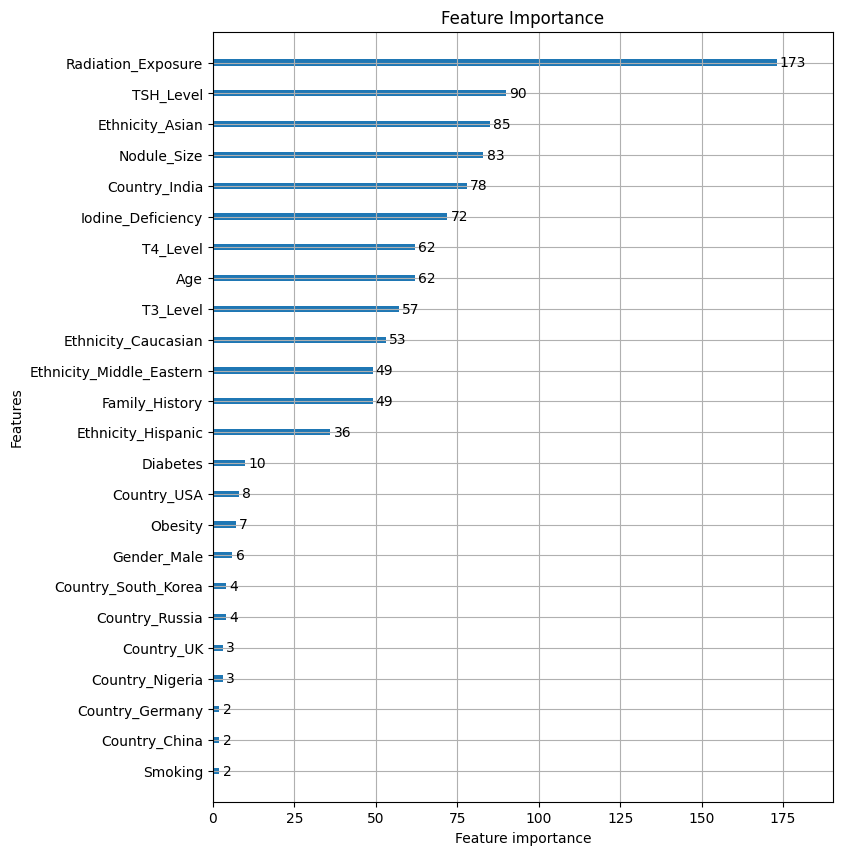

In [8]:
lgb.plot_importance(bst, figsize=(8, 10))
plt.title("Feature Importance")
plt.show()

In [9]:
precision = precision_score(y_test, y_pred_binary)
print(f"De los positivos, son positivos un: {precision}")

De los positivos, son positivos un: 0.7015064451001708


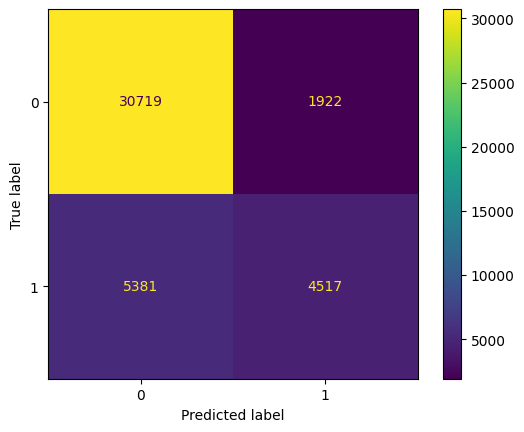

In [15]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()